In [1]:
#importing libraries
import yfinance as yf

import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import tensorflow as tf
import wandb
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.dates as mdates

from urllib.request import urlopen,Request
from bs4 import BeautifulSoup
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import panel as pn
pn.extension('tabulator')


# Nike Stock Overview

In [2]:
nke=yf.Ticker("NKE")

In [3]:
nke.info

{'address1': 'One Bowerman Drive',
 'city': 'Beaverton',
 'state': 'OR',
 'zip': '97005-6453',
 'country': 'United States',
 'phone': '503 671 6453',
 'website': 'https://www.nike.com',
 'industry': 'Footwear & Accessories',
 'industryKey': 'footwear-accessories',
 'industryDisp': 'Footwear & Accessories',
 'sector': 'Consumer Cyclical',
 'sectorKey': 'consumer-cyclical',
 'sectorDisp': 'Consumer Cyclical',
 'longBusinessSummary': 'NIKE, Inc., together with its subsidiaries, engages in the design, development, marketing, and sale of athletic footwear, apparel, equipment, accessories, and services worldwide. The company provides athletic and casual footwear, apparel, and accessories under the NIKE, Jumpman, Converse, Chuck Taylor, All Star, One Star, Star Chevron, and Jack Purcell trademarks. It also sells a line of performance equipment and accessories comprising bags, sport balls, socks, eyewear, timepieces, digital devices, bats, gloves, protective equipment, and other equipment for 

In [4]:
hist=nke.history(period="max")
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-02 00:00:00-05:00,0.127687,0.130463,0.127687,0.127687,100710400,0.0,0.0
1980-12-03 00:00:00-05:00,0.126299,0.126299,0.124911,0.124911,25177600,0.0,0.0
1980-12-04 00:00:00-05:00,0.129075,0.130463,0.129075,0.129075,22694400,0.0,0.0
1980-12-05 00:00:00-05:00,0.124911,0.124911,0.122135,0.122135,7590400,0.0,0.0
1980-12-08 00:00:00-05:00,0.116584,0.116584,0.115196,0.115196,5414400,0.0,0.0
...,...,...,...,...,...,...,...
2024-07-22 00:00:00-04:00,73.120003,75.339996,73.070000,74.860001,19385500,0.0,0.0
2024-07-23 00:00:00-04:00,74.629997,75.040001,73.239998,73.400002,11041800,0.0,0.0
2024-07-24 00:00:00-04:00,73.250000,73.389999,71.080002,71.089996,18563300,0.0,0.0


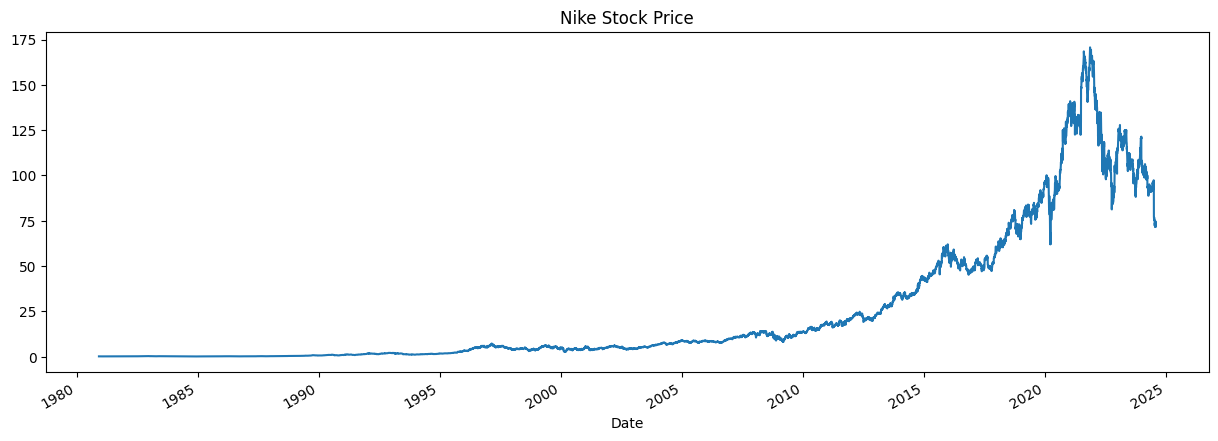

In [5]:
hist['Open'].plot(figsize=(15,5),title='Nike Stock Price')
plt.show()

In [6]:
nke.actions

,Dividends,Stock Splits
Date,,
1987-09-04 00:00:00-04:00,0.000625,0.0
1987-12-07 00:00:00-05:00,0.001563,0.0
1988-03-14 00:00:00-05:00,0.001563,0.0
1988-06-13 00:00:00-04:00,0.001563,0.0
1988-09-12 00:00:00-04:00,0.001563,0.0
...,...,...
2023-06-02 00:00:00-04:00,0.340000,0.0
2023-09-01 00:00:00-04:00,0.340000,0.0
2023-12-01 00:00:00-05:00,0.370000,0.0


In [7]:
nke.splits

Date
1990-10-08 00:00:00-04:00    2.0
1995-10-31 00:00:00-05:00    2.0
1996-10-24 00:00:00-04:00    2.0
2007-04-03 00:00:00-04:00    2.0
2012-12-26 00:00:00-05:00    2.0
2015-12-24 00:00:00-05:00    2.0
Name: Stock Splits, dtype: float64

In [8]:
nke.calendar

{'Dividend Date': datetime.date(2024, 7, 1),
 'Ex-Dividend Date': datetime.date(2024, 6, 3),
 'Earnings Date': [datetime.date(2024, 9, 26), datetime.date(2024, 9, 30)],
 'Earnings High': 0.64,
 'Earnings Low': 0.45,
 'Earnings Average': 0.52,
 'Revenue High': 11842000000,
 'Revenue Low': 11565800000,
 'Revenue Average': 11648600000}

# Pulling Out a Bunch Of Stocks
-5 years History

In [9]:
stocks=['AMZN','TCS','BTI','YUMC','NOW','MSFT','CRWD','TRGP','AVGO','MU']

In [10]:
h={}
for s in stocks:
    ticker=yf.Ticker(s)
    history=ticker.history(period="5y")
    h[s]=history

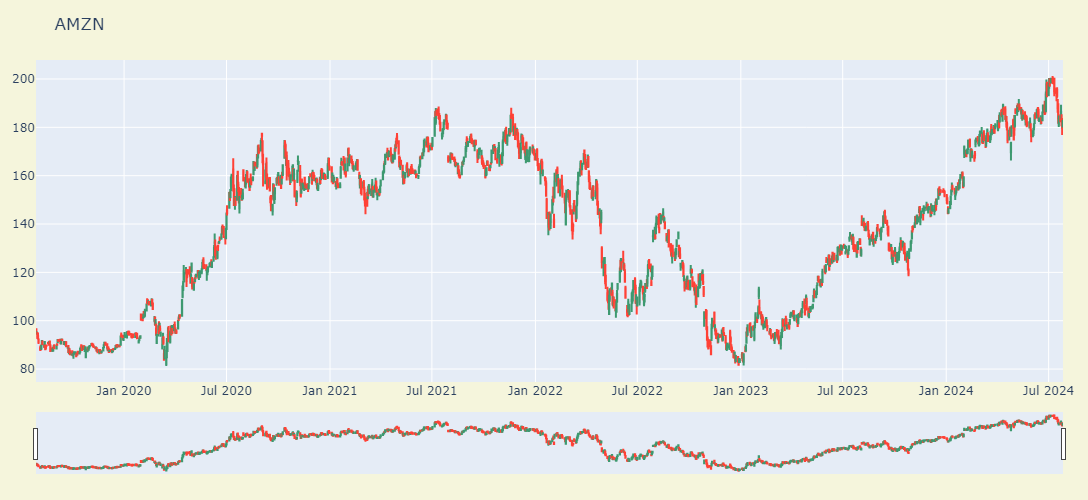

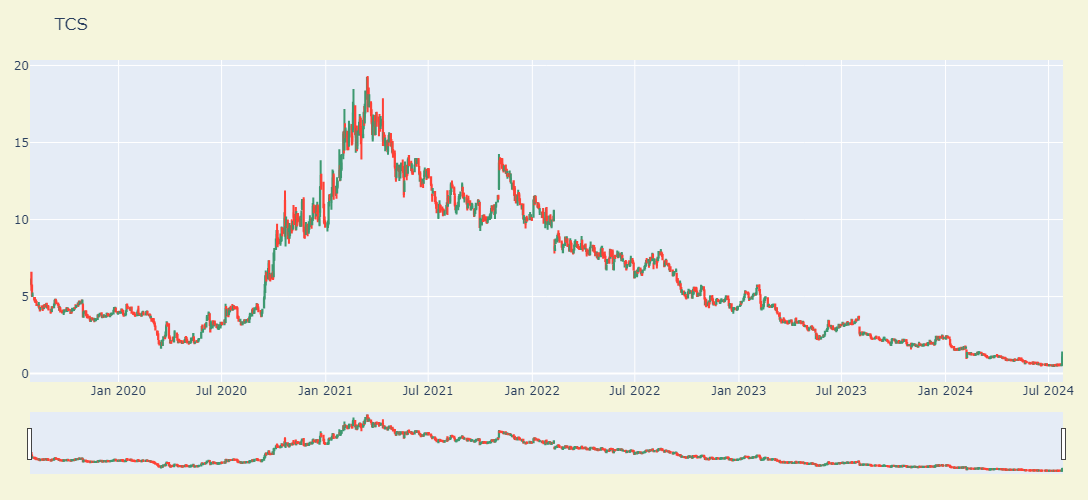

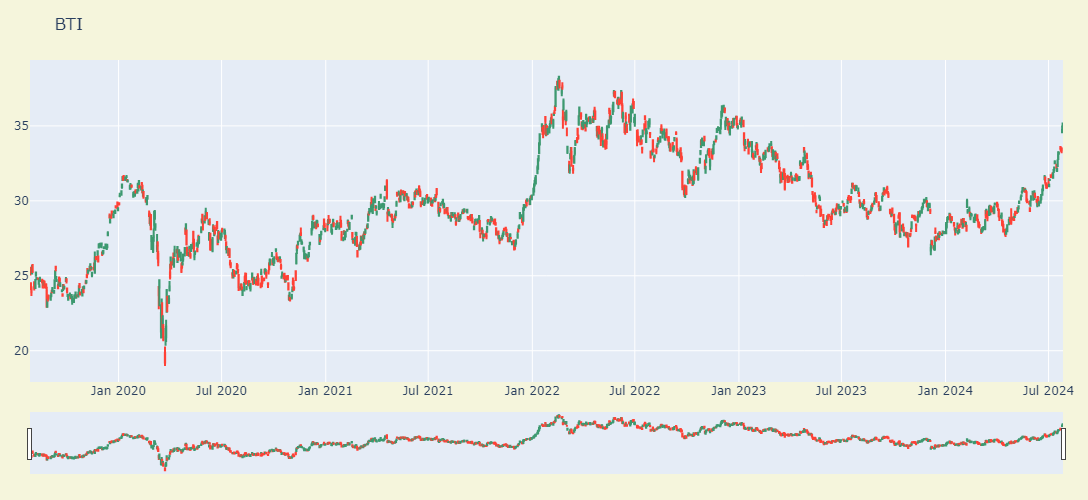

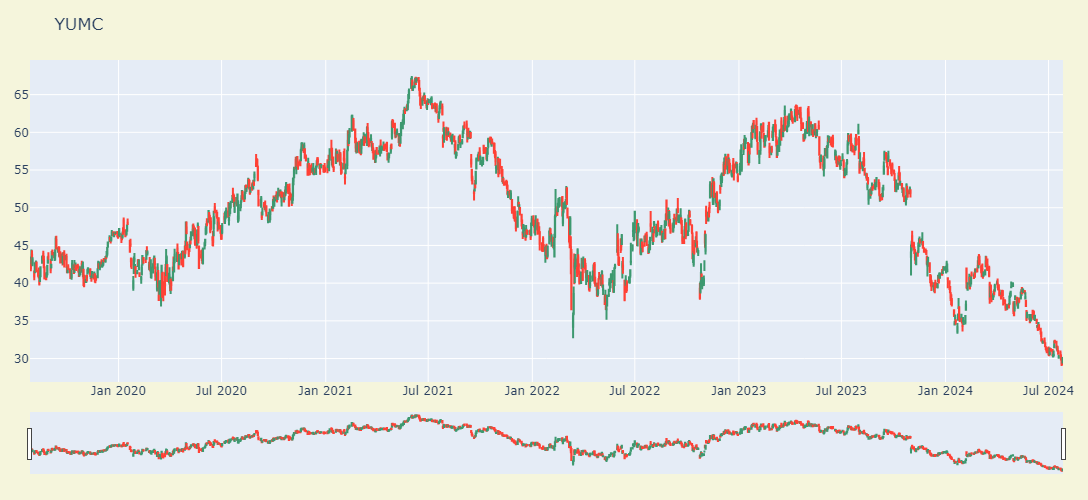

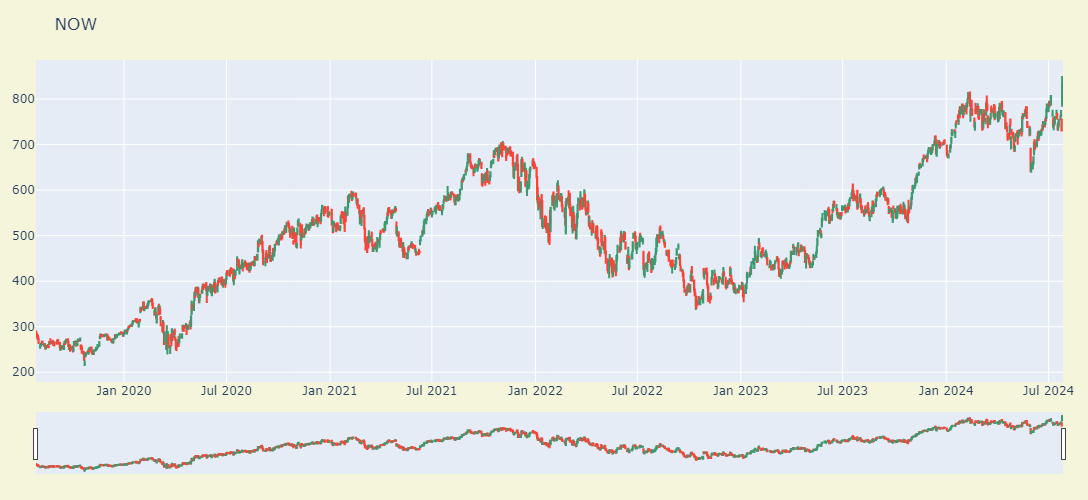

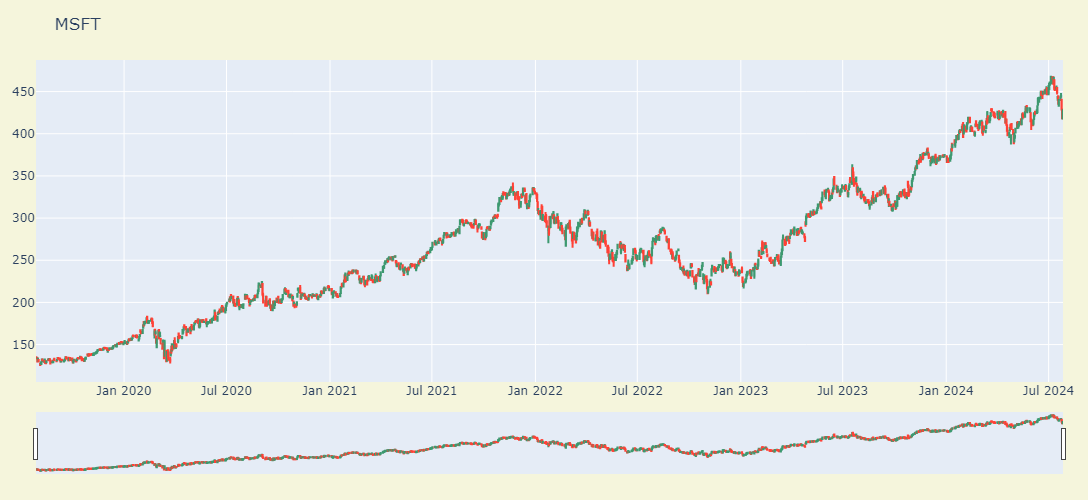

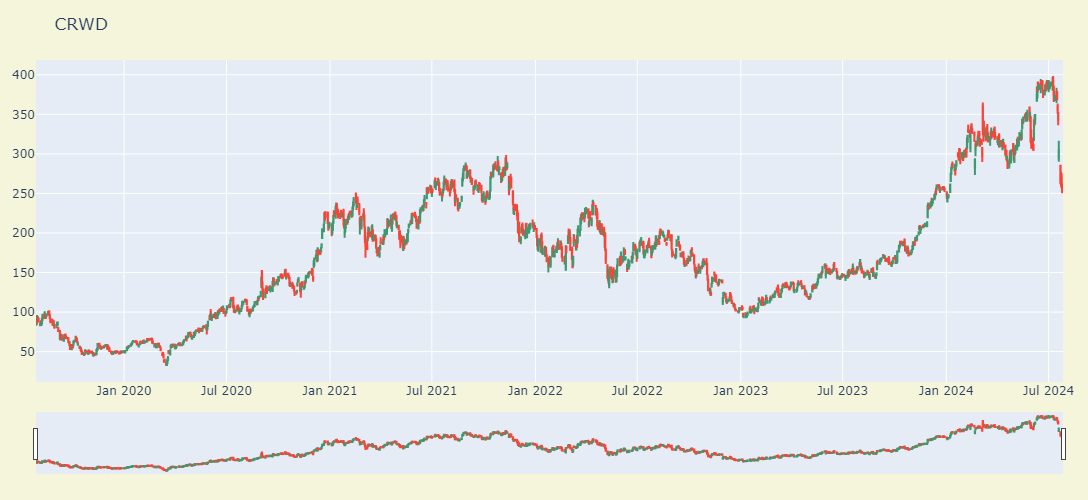

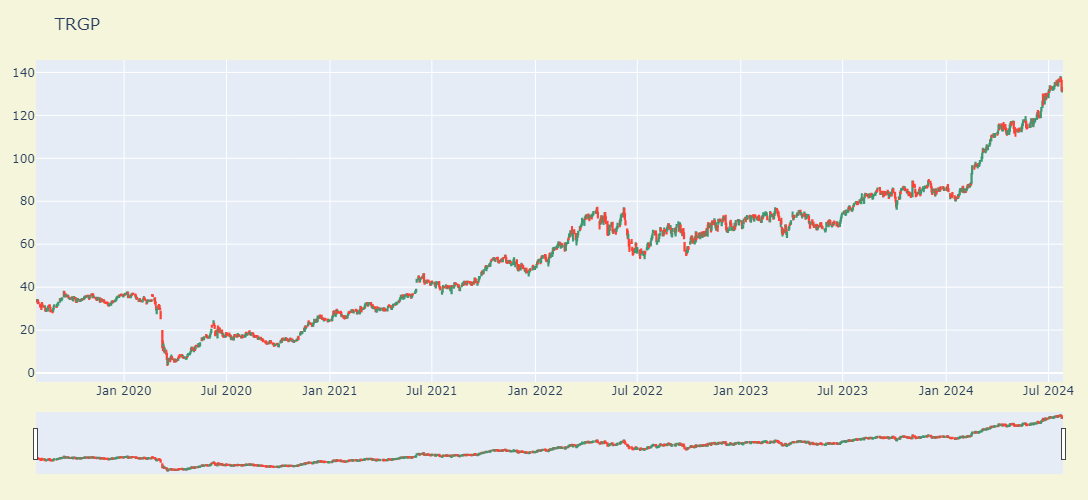

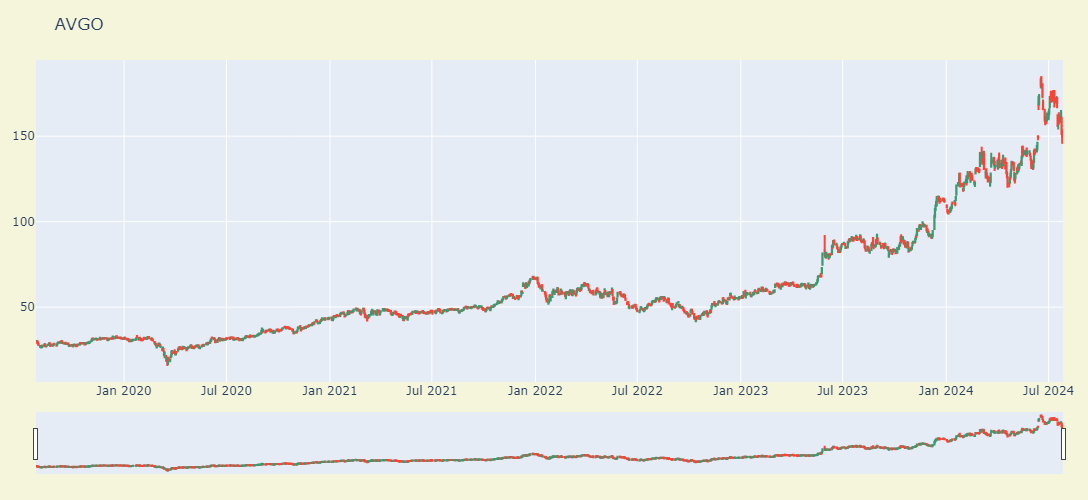

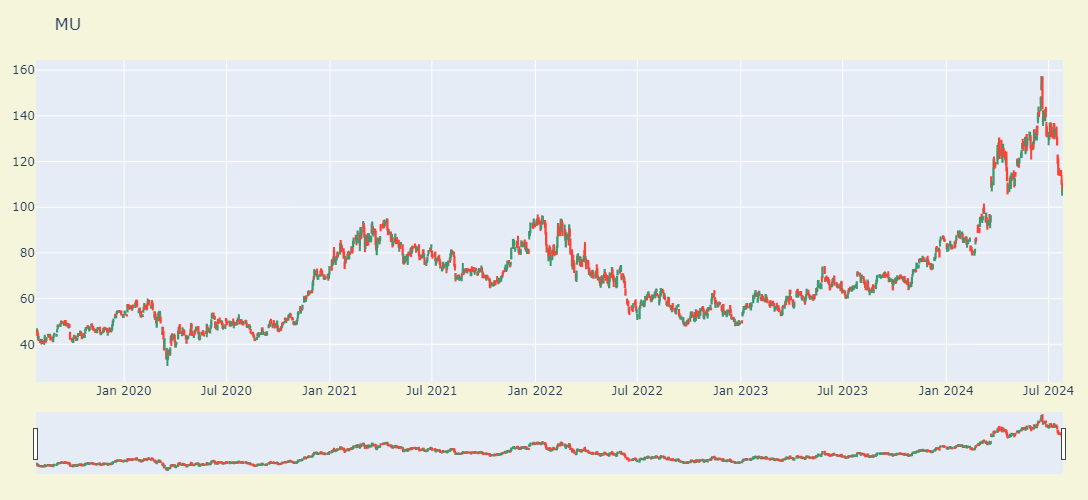

In [11]:
for stock in stocks:
    temp_df=h[stock].copy()
    fig=go.Figure(
    data=[
        go.Candlestick(
        x=temp_df.index,
        open=temp_df["Open"],
        high=temp_df["High"],
        low=temp_df["Low"],
        close=temp_df["Close"],)
    ])
    fig.update_layout(
          margin=dict(l=30,r=25,t=60,b=25),
          height=500,
          paper_bgcolor="Beige",
          title=stock,
    )
    fig.show()

# Pull NewsAbout Each Stock

In [12]:
main_url='https://finviz.com/quote.ashx?t='

stocks=['NKE','AMZN','TCS','BTI','YUMC','NOW','MSFT','CRWD','TRGP','AVGO','MU']

news_tables={}

for s in stocks:
    url=main_url+s
    req=Request(url=url,headers={'user-agent':'my-app'})
    response=urlopen(req)
    
    soup = BeautifulSoup(response,'html.parser')
    news_table= soup.find(id='news-table')
    news_tables[s]=news_table
    
parsed_data=[]

for s, news_table in news_tables.items():
    for rows in news_table.findAll('tr'):
        title=rows.a.text
        date_time=rows.td.text.strip().replace('\r\n', '').strip()
        parsed_data.append([s, date_time, title])  

df = pd.DataFrame(parsed_data, columns=['Stock', 'Date and Time', 'Title'])
df['Date and Time'] = df['Date and Time'].str.replace(r'\s+', ' ', regex=True).str.strip()
print(df)

     Stock      Date and Time  \
0      NKE  Jul-27-24 09:41AM   
1      NKE            08:00AM   
2      NKE            07:00AM   
3      NKE            06:15AM   
4      NKE  Jul-26-24 04:52PM   
...    ...                ...   
1095    MU            06:46AM   
1096    MU            06:38AM   
1097    MU            05:57AM   
1098    MU            01:02AM   
1099    MU  Jun-27-24 04:49PM   

                                                  Title  
0     A Bull Market Is Here: 2 Magnificent Stocks Do...  
1        3 No-Brainer Stocks to Buy With $300 Right Now  
2     5 Companies Feeling the Impact of the Paris Ol...  
3     A Once-in-a-Decade Buying Opportunity? This Ma...  
4     The Olympics Are Here. Take Gold With These 3 ...  
...                                                 ...  
1095  Why Micron Is a Better Market Indicator than S...  
1096  Nvidias Jensen Huang plays down competition wo...  
1097  Nvidia Stock Had a Stunning First Half. Why Th...  
1098  Decoding Micron T

# Sentimental Analysis


In [13]:
from transformers import TFAutoModelForSequenceClassification, AutoTokenizer
model_name = "ProsusAI/finbert"  # FinBERT is often used for financial sentiment analysis
model = TFAutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at ProsusAI/finbert and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


# Each Sentence Sentiments


In [14]:
def preprocess(texts):
    return tokenizer(texts, padding=True, truncation=True, return_tensors="tf")

def get_sentiment(predictions):
    sentiment_labels = ["negative", "neutral", "positive"]
    predicted_sentiments = np.argmax(predictions, axis=1)
    return [sentiment_labels[pred] for pred in predicted_sentiments]

inputs = preprocess(df['Title'].tolist())


In [18]:

outputs = model(inputs)
logits = outputs.logits
predictions = tf.nn.softmax(logits, axis=-1)

# Get sentiments
df['Sentiment'] = get_sentiment(predictions)

# Create result DataFrame
result_df = df[['Stock', 'Title', 'Sentiment']]

# Print the head of the result DataFrame

result_df.head()  


# #Classifying positive,negative and neutral sentiment values for each news

In [ ]:
def preprocess(texts):
    return tokenizer(texts, padding=True, truncation=True, return_tensors="tf")

positive_scores = predictions[:, 2].numpy()
neutral_scores = predictions[:, 1].numpy()
negative_scores = predictions[:, 0].numpy()

inputs = preprocess(df['Title'].tolist())

NameError: name 'predictions' is not defined

In [ ]:
outputs = model(inputs)
logits = outputs.logits
predictions = tf.nn.softmax(logits, axis=-1)

df['Positive'] = positive_scores
df['Neutral'] = neutral_scores
df['Negative'] = negative_scores

# Displaying columns
result_df = df[['Stock', 'Title', 'Positive', 'Neutral', 'Negative']]
print(result_df)

In [ ]:
result_df.to_csv('SentimentOfStocks',index=False)

In [ ]:
result_df.head()

In [ ]:
wandb.init(project="StockPrediction_SentimentAnalysisProject")

In [ ]:
wandb.run.log({"Financial Sentiment Analysis Table" : wandb.Table(dataframe=result_df)})
wandb.run.finish()

# Visualization Of Stocks

In [ ]:
average_scores = df[['Positive', 'Neutral', 'Negative']].mean()

# Plot the average sentiment scores
plt.figure(figsize=(8, 5))
sns.barplot(x=average_scores.index, y=average_scores.values, palette='viridis')
plt.title('Average Sentiment Scores')
plt.ylabel('Score')
plt.show()

# Distribution Of Sentiment Scores

In [ ]:
# Plot the distribution of sentiment scores for each title
df_long = df.melt(id_vars=['Stock', 'Title'], value_vars=['Positive', 'Neutral', 'Negative'],
                  var_name='Sentiment', value_name='Score')

plt.figure(figsize=(12, 8))
sns.boxplot(x='Sentiment', y='Score', data=df_long, palette='viridis')
plt.title('Distribution of Sentiment Scores')
plt.show()

# Count Of Predicted Sentiments

In [ ]:
# Classify each title based on the highest sentiment score
df['Predicted Sentiment'] = df[['Positive', 'Neutral', 'Negative']].idxmax(axis=1)

# Plot the count of each predicted sentiment
plt.figure(figsize=(8, 5))
sns.countplot(x='Predicted Sentiment', data=df, palette='viridis')
plt.title('Count of Predicted Sentiments')
plt.show()

# Sentiments trend by company


In [ ]:
# Aggregate average sentiment scores by company
avg_sentiment_by_company = df.groupby('Stock')[['Positive', 'Neutral', 'Negative']].mean().reset_index()

# Plot average sentiment scores by company
avg_sentiment_by_company.set_index('Stock').plot(kind='box', figsize=(12, 6), stacked=True, colormap='viridis')
plt.title('Average Sentiment Scores by Company')
plt.ylabel('Average Sentiment Score')
sentiment_trend=plt.show()


# Time Series Analysis For Stocks


In [ ]:
# Convert 'Date and Time' to datetime
df['Date and Time'] = pd.to_datetime(df['Date and Time'], errors='coerce')

# Plot sentiment over time for stocks
stocks=['NKE','AMZN','TCS','BTI','YUMC','NOW','MSFT','CRWD','TRGP','AVGO','MU']

for stock in stocks:

    plt.figure(figsize=(12, 6))
    plt.plot(stock_df['Date and Time'], stock_df['Positive'], label='Positive', color='green')
    plt.plot(stock_df['Date and Time'], stock_df['Neutral'], label='Neutral', color='blue')
    plt.plot(stock_df['Date and Time'], stock_df['Negative'], label='Negative', color='red')
    plt.xlabel('Date and Time')
    plt.ylabel('Sentiment Score')
    plt.title(f'Sentiment Over Time for {stock}')
    plt.legend()
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator())
    plt.xticks(rotation=45)
    plt.show()


#GUI

In [ ]:
import tkinter as tk
from tkinter import ttk
import yfinance as yf
import pandas as pd
import numpy as np
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
from transformers import TFAutoModelForSequenceClassification, AutoTokenizer
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

# Function to fetch and process news data
def fetch_and_process_news(stock):
    main_url = 'https://finviz.com/quote.ashx?t='
    url = main_url + stock
    req = Request(url=url, headers={'user-agent': 'my-app'})
    response = urlopen(req)
    soup = BeautifulSoup(response, 'html.parser')
    news_table = soup.find(id='news-table')

    parsed_data = []
    for rows in news_table.findAll('tr'):
        title = rows.a.text
        date_time = rows.td.text.strip().replace('\r\n', '').strip()
        parsed_data.append([stock, date_time, title])

    df = pd.DataFrame(parsed_data, columns=['Stock', 'Date and Time', 'Title'])
    df['Date and Time'] = df['Date and Time'].str.replace(r'\s+', ' ', regex=True).str.strip()
    return df

# Function to analyze sentiment
def analyze_sentiment(df):
    model_name = "ProsusAI/finbert"
    model = TFAutoModelForSequenceClassification.from_pretrained(model_name)
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    
    def preprocess(texts):
        return tokenizer(texts, padding=True, truncation=True, return_tensors="tf")
    
    inputs = preprocess(df['Title'].tolist())
    outputs = model(inputs)
    logits = outputs.logits
    predictions = tf.nn.softmax(logits, axis=-1)
    
    sentiment_labels = ["negative", "neutral", "positive"]
    predicted_sentiments = np.argmax(predictions, axis=1)
    df['Sentiment'] = [sentiment_labels[pred] for pred in predicted_sentiments]

    positive_scores = predictions[:, 2].numpy()
    neutral_scores = predictions[:, 1].numpy()
    negative_scores = predictions[:, 0].numpy()

    df['Positive'] = positive_scores
    df['Neutral'] = neutral_scores
    df['Negative'] = negative_scores

    return df

# Function to plot sentiment scores
def plot_sentiment_scores(df, stock):
    plt.figure(figsize=(8, 5))
    sns.barplot(x=['Positive', 'Neutral', 'Negative'], y=df[['Positive', 'Neutral', 'Negative']].mean(), palette='viridis')
    plt.title(f'Average Sentiment Scores for {stock}')
    plt.ylabel('Score')
    plt.show()

# Function to display sentiment result
def display_sentiment():
    stock = stock_var.get()
    if stock:
        df = fetch_and_process_news(stock)
        df = analyze_sentiment(df)
        plot_sentiment_scores(df, stock)
        result_text.delete(1.0, tk.END)
        result_text.insert(tk.END, df[['Stock', 'Title', 'Sentiment']].to_string(index=False))

# GUI Setup
root = tk.Tk()
root.title("Stock Sentiment Analysis")

mainframe = ttk.Frame(root, padding="10 10 20 20")
mainframe.grid(row=0, column=0, sticky=(tk.W, tk.E, tk.N, tk.S))

stock_var = tk.StringVar()
stock_label = ttk.Label(mainframe, text="Select Stock:")
stock_label.grid(row=0, column=0, sticky=tk.W)

stock_entry = ttk.Entry(mainframe, textvariable=stock_var)
stock_entry.grid(row=0, column=1, sticky=(tk.W, tk.E))

analyze_button = ttk.Button(mainframe, text="Analyze Sentiment", command=display_sentiment)
analyze_button.grid(row=0, column=2, sticky=tk.W)

result_text = tk.Text(mainframe, height=20, width=100)
result_text.grid(row=1, column=0, columnspan=3, sticky=(tk.W, tk.E))

for child in mainframe.winfo_children():
    child.grid_configure(padx=5, pady=5)

root.mainloop()
